# 911 Calls Capstone Project

### Import Libraries

In [3]:
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Create DataFrame

In [8]:
df = pd.read_csv('911.csv')

In [9]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Check Some Data

In [18]:
df['zip'].value_counts().head(5)                           # Top 5 Zip Code

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [20]:
df['twp'].value_counts().head(5)                        # Top 5 Townships(twp)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [30]:
df['title'].nunique()                                 # Number of unique title codes in 'title' column

110

In [31]:
# OR
len(df['title'].unique())

110

# Analyze 'title' Column

### Create 'Reason' column from 'title' column

In [50]:
df['Reason'] = df['title'].apply(lambda t: t.split(':')[0])

In [40]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


### Most Common Reasons For a 911 call

In [42]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

### Count Plot for Reasons

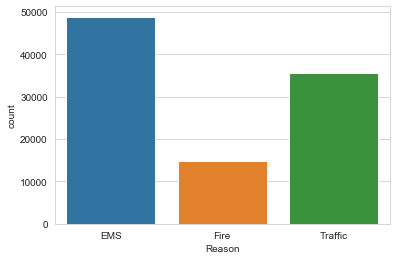

In [43]:
sns.countplot(x='Reason', data=df, cmap)

# Analyze 'timeStamp' Column

In [48]:
type(df['timeStamp'].iloc[0])                                       #  Type

str

### Convert 'timeStamp' Column From String to DateTime.

In [51]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [54]:
type(df['timeStamp'].iloc[0])                                   # Type

pandas._libs.tslibs.timestamps.Timestamp

In [142]:
t = df['timeStamp'].iloc[0]

In [143]:
t.date()

datetime.date(2015, 12, 10)

In [144]:
t.time()

datetime.time(17, 40)

In [145]:
t.hour

17

In [146]:
t.year

2015

### Create 'Hour', 'Month', 'Week', 'Year' and 'Day of Week' Columns

In [147]:
df['Hour'] = df['timeStamp'].apply(lambda t: t.hour)
df['Month'] = df['timeStamp'].apply(lambda t: t.month)
df['Week'] = df['timeStamp'].apply(lambda t: t.week)
df['Year'] = df['timeStamp'].apply(lambda t: t.year)
df['Day of Week'] = df['timeStamp'].apply(lambda t: t.dayofweek)

In [148]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Week,Year,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,50,2015,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,50,2015,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,50,2015,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,50,2015,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,50,2015,3


### Convert 'Day of Week' into String names

In [70]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [71]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [72]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Week,Year,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,50,2015,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,50,2015,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,50,2015,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,50,2015,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,50,2015,Thu


### Count Plot for 'Day of Week' Column

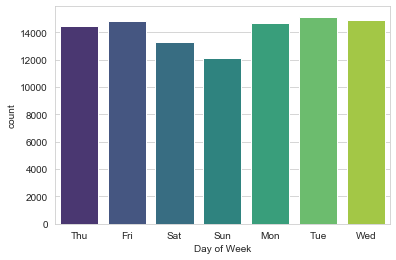

In [106]:
sns.countplot(x='Day of Week', data=df, palette='viridis')

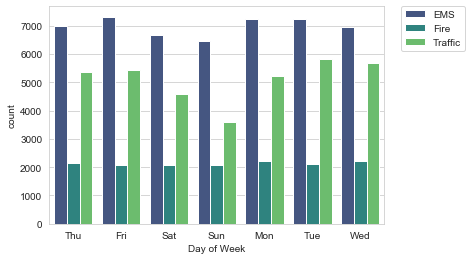

In [81]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')       # Countplot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)                 # Relocate the legend

### Count Plot For Month

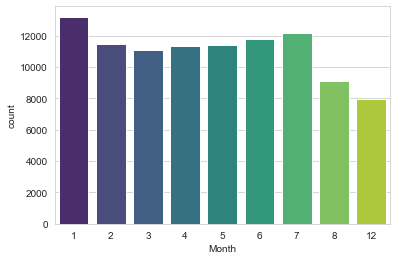

In [108]:
sns.countplot(x='Month', data=df, palette='viridis')                               # Countplot 

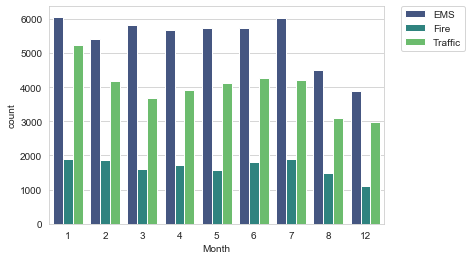

In [84]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')             # Countplot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)                 # Relocate the legend

### Create a gropuby Object for 'Month' Column with count()

In [89]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Week,Year,Day of Week
Month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423


### Create Plots for byMonth

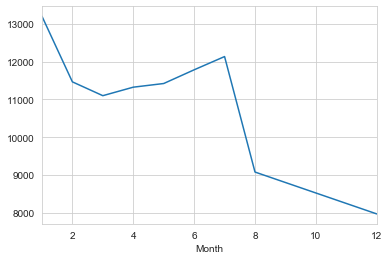

In [127]:
byMonth['lat'].plot()                                      # line plot

#### Seaborn lmplot() to create the number of calls per month

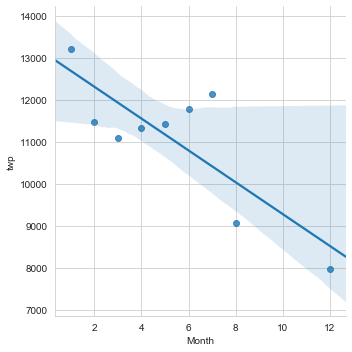

In [136]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

### Create 'Date' and 'Time' Columns From 'timeStamp' Column

In [153]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())            # Date
df['Time'] = df['timeStamp'].apply(lambda t: t.time())            # Time

In [152]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Week,Year,Day of Week,Date,Time
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,50,2015,3,2015-12-10,17:40:00
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,50,2015,3,2015-12-10,17:40:00
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,50,2015,3,2015-12-10,17:40:00
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,50,2015,3,2015-12-10,17:40:01
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,50,2015,3,2015-12-10,17:40:01


### Create a gropuby Object for 'Date' Column with count()

In [164]:
byDate = df.groupby('Date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Week,Year,Day of Week,Time
Date,,,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447,447,447


### Create Plot for byDate

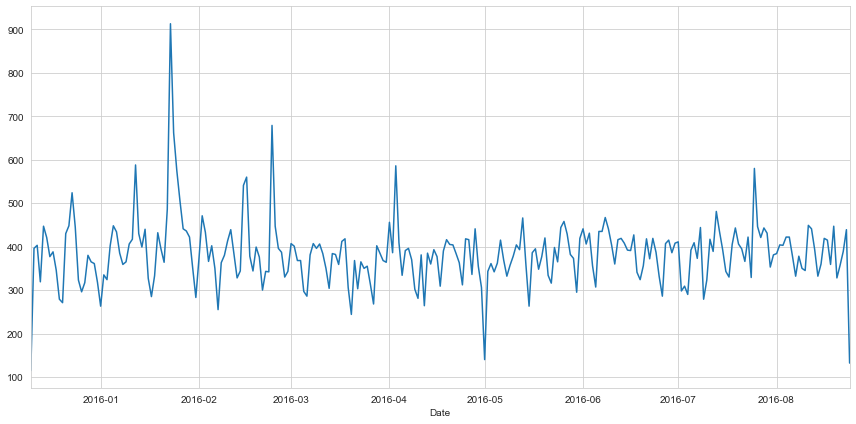

In [178]:
plt.figure(figsize=(12,6))
byDate['lat'].plot()                         # Plot
plt.tight_layout()

# Plots for 'Reason' Column

#### Traffic

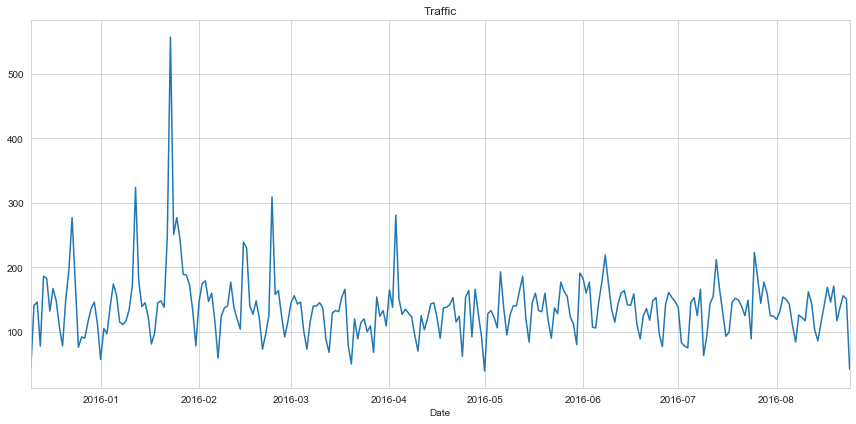

In [185]:
plt.figure(figsize=(12,6))
traffic = df[df['Reason']=='Traffic'].groupby('Date').count()['lat']
traffic.plot()
plt.title("Traffic")
plt.tight_layout()

#### Fire

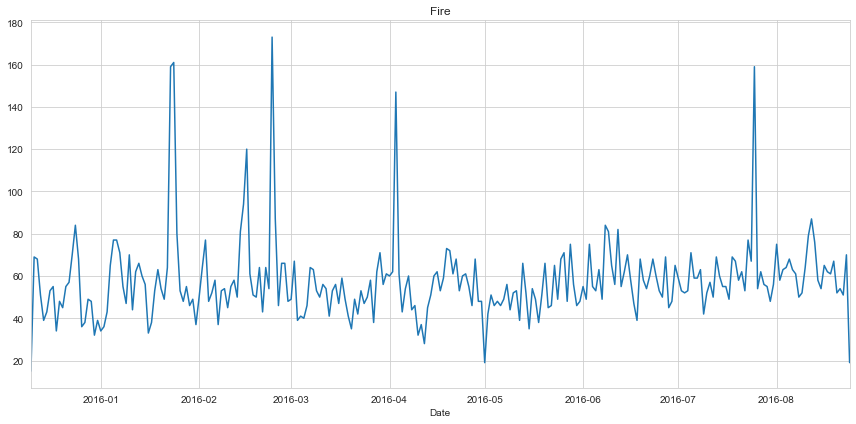

In [186]:
plt.figure(figsize=(12,6))
fire = df[df['Reason']=='Fire'].groupby('Date').count()['lat']
fire.plot()
plt.title("Fire")
plt.tight_layout()

#### EMS

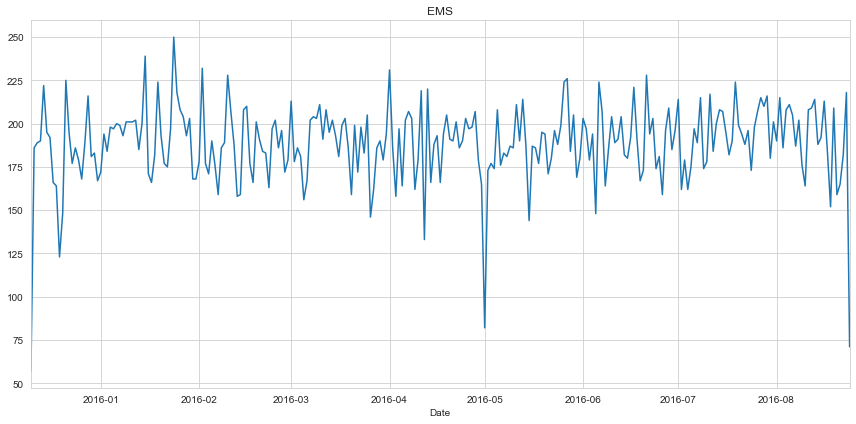

In [187]:
plt.figure(figsize=(12,6))
ems = df[df['Reason']=='EMS'].groupby('Date').count()['lat']
ems.plot()
plt.title("EMS")
plt.tight_layout()

# Create Heatmaps

In [225]:
dayHour = df.pivot_table(index="Day of Week", columns="Hour", values="Reason" ,aggfunc="count")
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
5,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
6,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330


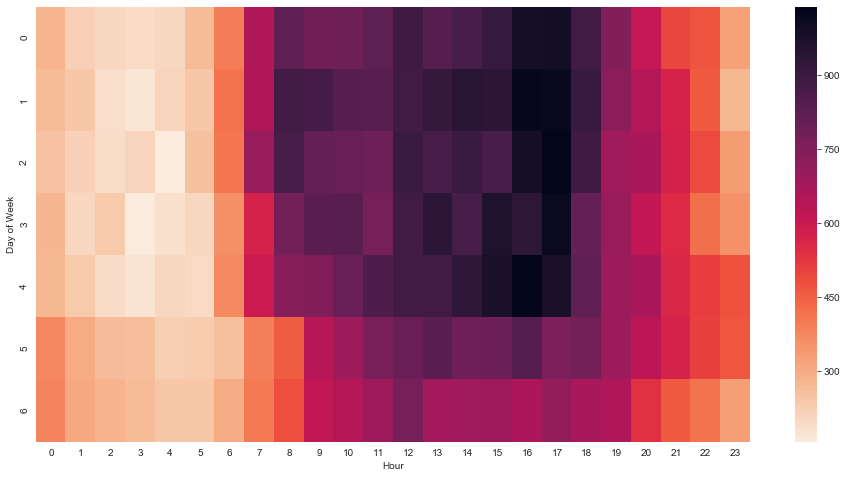

In [226]:
plt.figure(figsize=(16,8))
sns.heatmap(dayHour, cmap='rocket_r')

# Create Clustermap

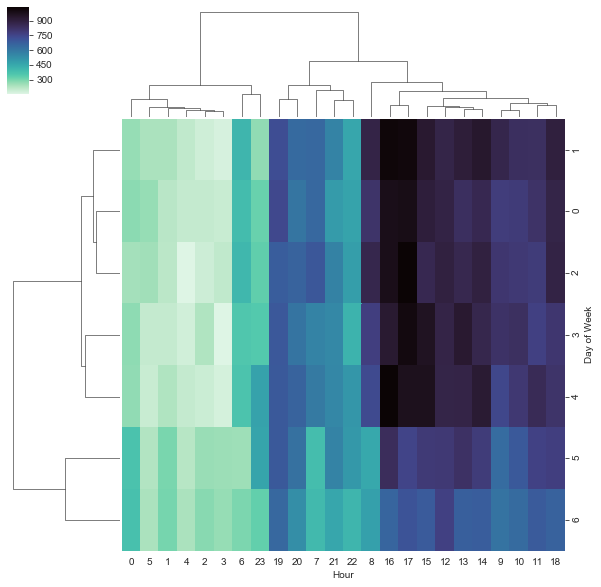

In [227]:
sns.clustermap(dayHour, cmap='mako_r')